# Bereitstellung von Chemikalien III


Die Pharmafirma Boring International möchte die Versorgung ihres Betriebsgeländes mit chemischen Rohstoffen von einem Außenlager optimieren. Jeder Tag ist eingeteilt in gewisse Zeiteinheiten. Zu jeder Zeiteinheit kann ein Bedarf an einem bestimmten Rohstoff auf dem Betriebsgelände vorliegen. Um den Bedarf zu decken, verkehren Lastwagen zwischen Außenlager und Betriebsgelände. Rohstoffe, die der Lastwagen transportiert, können entweder direkt genutzt werden, um den Bedarf zu befriedigen, oder sie können zwischengelagert werden, um einen späteren Bedarf zu decken. Das Zwischenlager hat eine begrenzte Lagerkapazität, jeder Lastwagen hat ebenfalls eine beschränkte Transportkapazität.  
Jede Fahrt verursacht Kosten. Diese sollen minimiert werden.
Es stehen mehrere Lastwagen zur Verfügung. 
Das Außenlager ist weiter entfernt: 
Jeder Lastwagen braucht $r$ Zeiteinheiten für eine Fahrt von Betriebsgelände zum Außenlager und zurück. D.h. zwischen zwei Lieferungen eines Lastwagens
müssen mindestens $r$ Zeiteinheiten liegen. Zudem gibt es Rohstoffe, die nicht zusammen in einem Lastwagen transportiert werden dürfen (z.B. Wasserstoff und Sauerstoff), etwa weil bei einem Unfall dann Explosionsgefahr bestünde.

**NEU** Das Zwischenlager auf dem Betriebsgelände besteht aus mehreren Lagerstätten, jedes mit seiner eigenen Lagerkapazität. Auch in den Zwischenlagern dürfen gewisse Rohstoffe nicht zusammen gelagert werden (und zwar die gleichen Rohstoffpaare, die auch nicht zusammen transportiert werden dürfen). Wenn es nicht möglich ist, einen Rohstoff zum vorgesehenen Zeitpunkt bereitzustellen, entstehen Strafkosten. Die Strafkosten belaufen sich auf $f$€ pro Liter Rohstoff pro Zeiteinheit. D.h. die Strafkosten entfallen zu jeder Zeiteinheit, die der Rohstoff zu spät bereitgestellt wird.

Jede Instanz ist durch folgende Daten charakterisiert: 
* Die Menge der Rohstoffe (Chemikalien): $\mathcal C$
* Die Zeitperioden: $0,...,T-1$
* Bedarf zum Zeitpunkt $t$ an Rohstoff $c$: $d_{ct}$
* Dauer der Transportfahrt: $r$
* Kosten einer Fahrt: $g$ 
* Kapazität der Lieferwagen: $h$
* Anzahl der Lieferwagen: $k$
* Menge von Paaren von Rohstoffen, die nicht zusammen transportiert oder gelagert werden dürfen: $\mathcal I$
* Anzahl der Zwischenlager: $S$ 
* Kapazität des Zwischenlagers $s$: $b_s$
* Strafkosten pro Liter und pro Zeiteinheit: $f$

Hier gibt's noch ein wenig Kleingedrucktes, das Sie wahrscheinlich ignorieren können. Um die Formulierung des MIPs ein wenig einfacher zu gestalten, erlauben wir, dass am Ende jeder Zeitperiode in den Lagern umgeschichtet werden darf, dh, dass eingelagerter Rohstoff in Lager $i$ in Lager $j$ umgelagert werden darf. 

Variablen:
* $z_{tv}\in\{0,1\}$: Indikator, ob zum Zeitpunkt $t$ eine Lieferung mit Lastwagen $v$ stattfindet
* $x_{ctv}\geq 0$: Menge an Rohstoff $c$, der zu Beginn von Periode $t$ per Lastwagen $v$ angeliefert wird
* $y_{ctv}\in\{0,1\}$: Indikator, ob Lastwagen $v$ zu Beginn von Periode $t$ den Rohstoff $c$ anliefert
* $p_{cts}\geq 0$: Menge an Rohstoff $c$, der zum Ende von Periode $t$ im Zwischenlager $s$ vorhanden ist
* $q_{cts}\in\{0,1\}$: Indikator ob Rohstoff $c$ am Ende von Periode $t$ im Zwischenlager $s$ vorhanden ist
* $w_{ct}\geq 0$: Menge an Rohstoff $c$, der am Ende von Periode $t$ zu spät ist (fehlt)

\begin{align}
\min\, & g\sum_{t=1}^T\sum_{v=1}^k z_{tv}+\sum_{c\in\mathcal C}\sum_{t=1}^Tfw_{ct} & (1)\\
& \sum_{c\in\mathcal C} p_{cts}\leq b_s\quad\text{für alle }t=0,\ldots T-1,s=1,\ldots, S  & (2)\\
& p_{cts}\leq b_sq_{cts}\quad\text{für alle }c\in\mathcal C,t=0,\ldots T-1,s=1,\ldots, S  & (3)\\
& q_{cts}+q_{c'ts}\leq 1\quad\text{für alle }(c,c')\in I,t,s & (4)\\
& \sum_{c\in\mathcal C}x_{ctv}\leq hz_{tv}\quad\text{für alle }t=0,\ldots T-1, v=1,\ldots,k  & (6)\\
& x_{ctv}\leq hy_{ctv}\quad\text{für alle }c,t,v & (7)\\
& y_{ctv}+y_{c'tv}\leq 1\quad\text{für alle }(c,c')\in I,t,v & (8)\\
& p_{cts}\leq b_sq_{cts}\quad\text{für alle } c,t,s& (9)\\
& \sum_{s=1}^Sp_{cts} + d_{ct}+w_{c,t-1} = \sum_{s=1}^Sp_{c,t-1,s}+\sum_{v=1}^kx_{ctv}+w_{ct}\quad\text{für alle } t=0,\ldots T-1,c\in\mathcal C &(10)\\
& p_{c,-1,s} =0\quad\text{für alle }c\in\mathcal C,s=1,\ldots,S & (11)\\
& w_{c,-1} =0\quad\text{für alle }c\in\mathcal C & (12)\\
& \sum_{i=t-r+1}^tz_{iv}\leq 1\quad\text{für alle }t=r,\ldots,T-1, v=1,\ldots,k & (13) 
\end{align}

Wenn Sie lokal auf Ihrem Rechner arbeiten, mip installiert haben und chm.py in das gleiche Verzeichnis gelegt haben, kommentieren Sie die ersten beiden Zeilen aus. 

In [1]:
!wget -q https://raw.githubusercontent.com/henningbruhn/mobp/main/chem_aufgabe/chm.py
!pip install mip --no-deps # ACHTUNG: dies ist für die momentane Colab-Version, da gibt's einen Konflikt mit dem package cffi
#!pip install mip
    
import mip   ## Der mip-solver
import chm   ## Code zur Instanzenerzeugung und zur graphischen Darstellung

Wir beschaffen uns die Instanz <code>inst</code>, mit der Sie arbeiten sollen.

In [2]:
inst=chm.get_instance3()
print(inst)

C Anzahl Rohstoffe: ...................4
T Anzahl Zeitperioden: ................11
g Kosten einer Fahrt: .................1
h Kapazität der Lastwagen: ............13
d Gesamtbedarf über alle Zeitperioden: 245.0
k Anzahl der Lastwagen: ...............5
r Fahrtzeit der Lastwagen: ............3
I gefährliche Rohstoffpaare: ..........[(2, 3), (0, 1), (0, 3), (0, 2)]
  --> Schwefel & Kryptonit, Chlor & Kohlenstoff, Chlor & Kryptonit, Chlor & Schwefel
S Anzahl Zwischenlager: ...............2
b Kapazitäten Zwischenlager: ..........[38, 28]
f Strafkosten späte Bereitstellung: ...100



Wir zeigen uns wieder den Bedarf an:

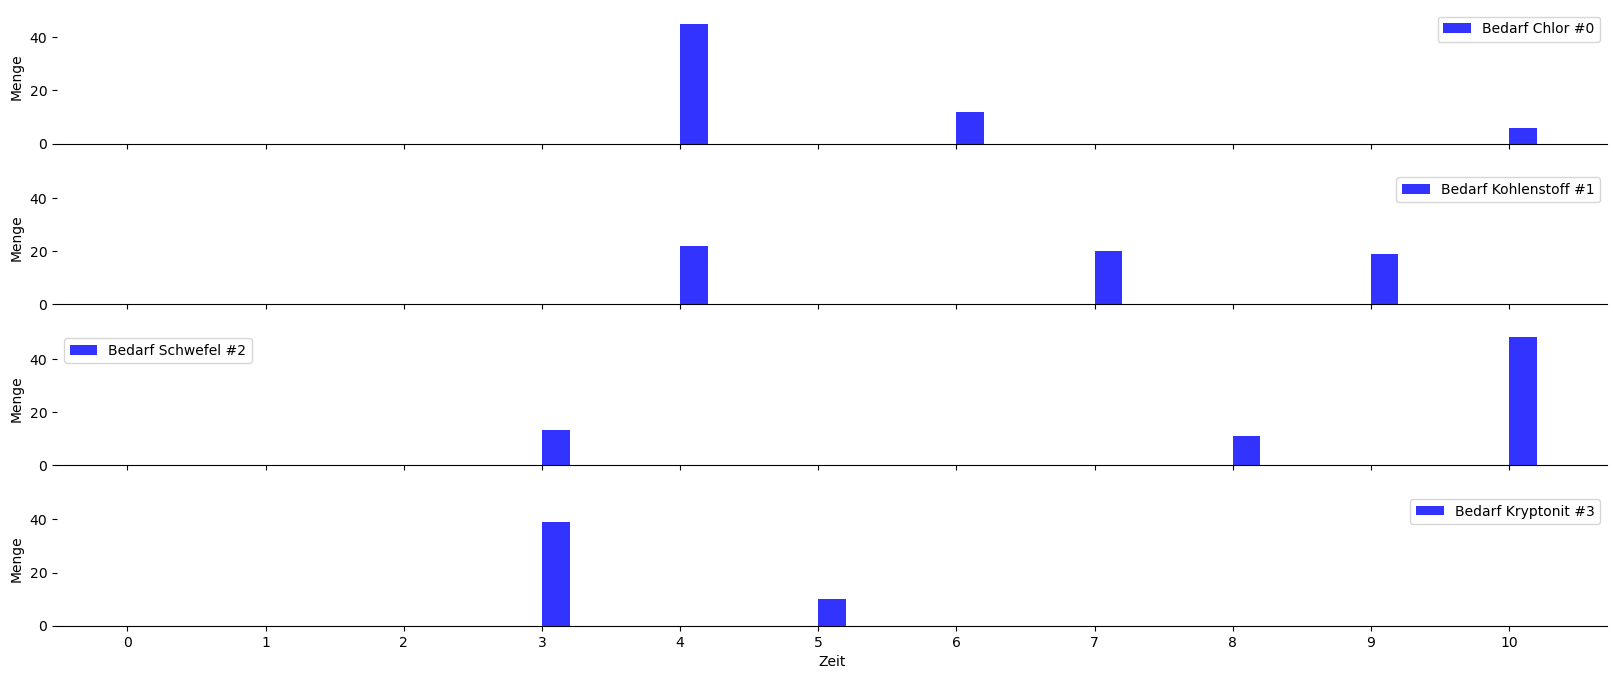

In [3]:
chm.show_demand(inst)

## Das Modell

Wir starten wieder mit den Variablen:

In [4]:
m=mip.Model()
# Zusätzliche Variablen in Periode T, damit p[c][-1][s] definiert ist
p=[[[m.add_var() for _ in range(inst.S)] for _ in range(inst.T+1)] for _ in range(inst.C)]
q=[[[m.add_var(var_type=mip.BINARY) for _ in range(inst.S)] for _ in range(inst.T)] for _ in range(inst.C)]
x=[[[m.add_var() for _ in range(inst.k)] for _ in range(inst.T)] for _ in range(inst.C)]
y=[[[m.add_var(var_type=mip.BINARY) for _ in range(inst.k)] for _ in range(inst.T)] for _ in range(inst.C)]
z=[[m.add_var(var_type=mip.BINARY) for _ in range(inst.k)] for _ in range(inst.T)]
# Zusätzliche Variablen in Periode T, damit w[c][-1] definiert ist
w=[[m.add_var() for _ in range(inst.T+1)] for _ in range(inst.C)]

Bedingung (2):

In [5]:
for t in range(inst.T):
    for s in range(inst.S):
        m+=mip.xsum(p[c][t][s] for c in range(inst.C))<=inst.b[s]

Bedingung (3):

In [6]:
for t in range(inst.T):
    for s in range(inst.S):
        for c in range(inst.C):
            m+=p[c][t][s]<=inst.b[s]*q[c][t][s]

Bedingung (4):

In [7]:
for c,cc in inst.I:
    for t in range(inst.T):
        for s in range(inst.S):
            m+=q[c][t][s]+q[cc][t][s]<=1

Bedingung (6):

In [8]:
for t in range(inst.T):
    for v in range(inst.k):    
        m+=mip.xsum(x[c][t][v] for c in range(inst.C))<=z[t][v]*inst.h

Bedingung (7):

In [9]:
for c in range(inst.C):
    for t in range(inst.T):
        for v in range(inst.k):    
            m+=x[c][t][v]<=inst.h*y[c][t][v]

Bedingung (8):

In [10]:
for c,cc in inst.I:
    for t in range(inst.T):
        for v in range(inst.k):
            m+=y[c][t][v]+y[cc][t][v]<=1

Bedingung (9):

In [11]:
for t in range(inst.T):
    for c in range(inst.C):
        for s in range(inst.S):
            m+=p[c][t][s]<=inst.b[s]*q[c][t][s]

Bedingung (10) und (11), (12):

In [12]:
for c in range(inst.C):
    for s in range(inst.S):
        m+=p[c][-1][s]==0
for c in range(inst.C):
        m+=w[c][-1]==0
for t in range(inst.T):
    for c in range(inst.C):
        m+=mip.xsum(p[c][t][s] for s in range(inst.S))+inst.d[c][t]+w[c][t-1]==mip.xsum(p[c][t-1][s] for s in range(inst.S))+ \
           mip.xsum(x[c][t][v] for v in range(inst.k))+w[c][t]

Bedingung (13):

In [13]:
for t in range(inst.T):
    for v in range(inst.k):
        start=max(0,t-inst.r+1)
        m+=mip.xsum(z[i][v] for i in range(start,t+1))<=1

Zielfunktion und Optimierung starten:

In [14]:
m.objective=mip.minimize(mip.xsum(inst.g*z[t][v] for t in range(inst.T) for v in range(inst.k))+mip.xsum(inst.f*w[c][t] for c in range(inst.C) for t in range(inst.T)))

Wir limitieren mit dem Parameter <code>max_seconds=120</code> die verfügbare Rechenzeit für die Optimierung, da wir ungeduldig sind. Wir lassen den Optimierungsstatus ausgeben (da nun nicht mehr klar ist, ob wir zur Optimalität gelöst haben) und auch die Gesamt- und die Strafkosten.

In [15]:
m.verbose=0
opt_status=m.optimize(max_seconds=120)
print("opt status: {}".format(opt_status))
penalty=sum([www.x*inst.f for ww in w for www in ww])
print("Gesamtkosten: {}".format(m.objective_value))
print("Strafkosten : {}".format(penalty))

opt status: OptimizationStatus.FEASIBLE
Gesamtkosten: 619.0
Strafkosten : 600.0


## Visualisierung der Lösung

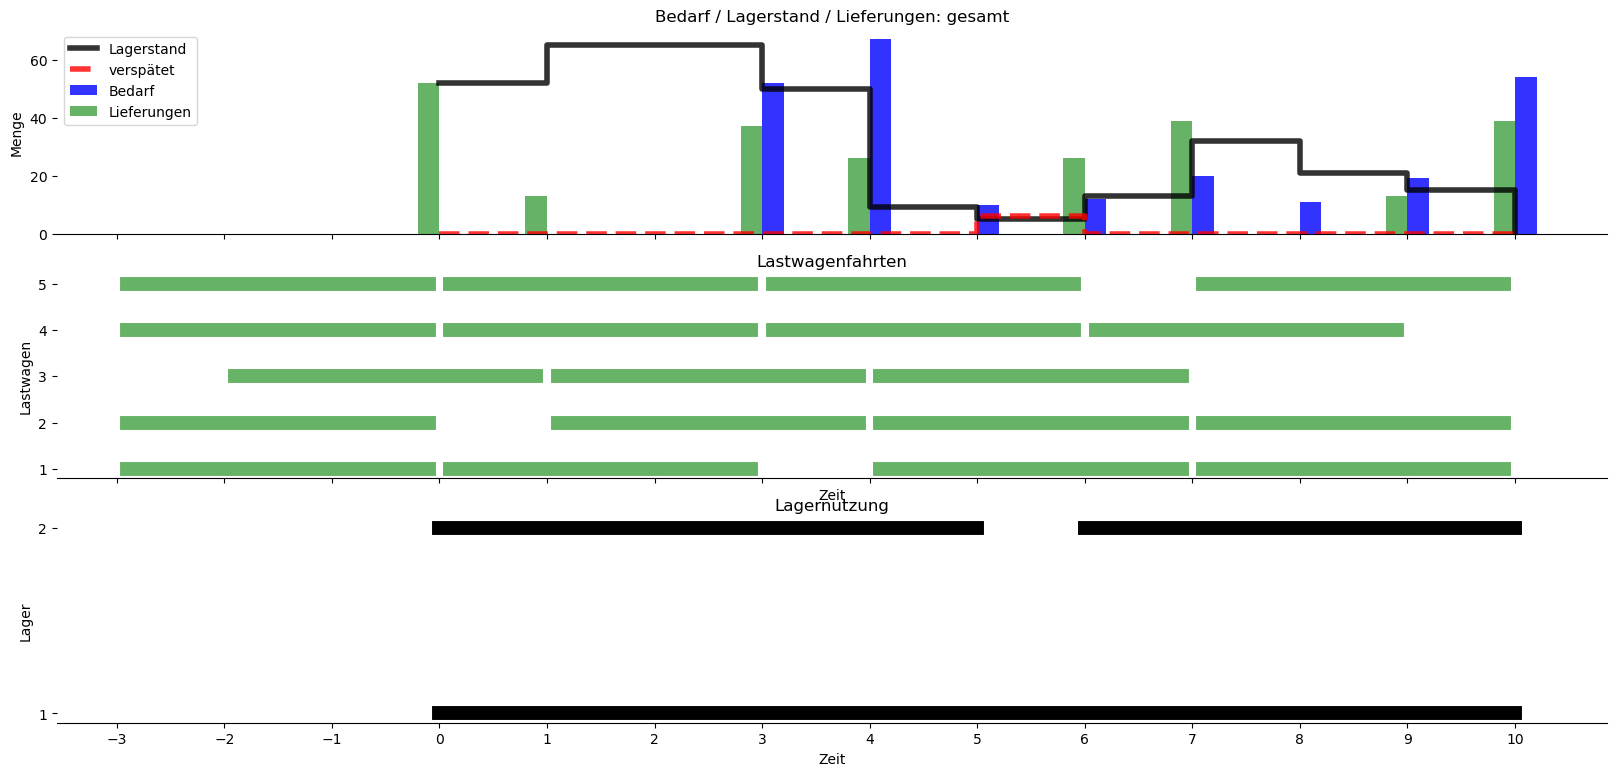

In [16]:
chm.show_solution3(x,z,p,w,inst,chemical='all')

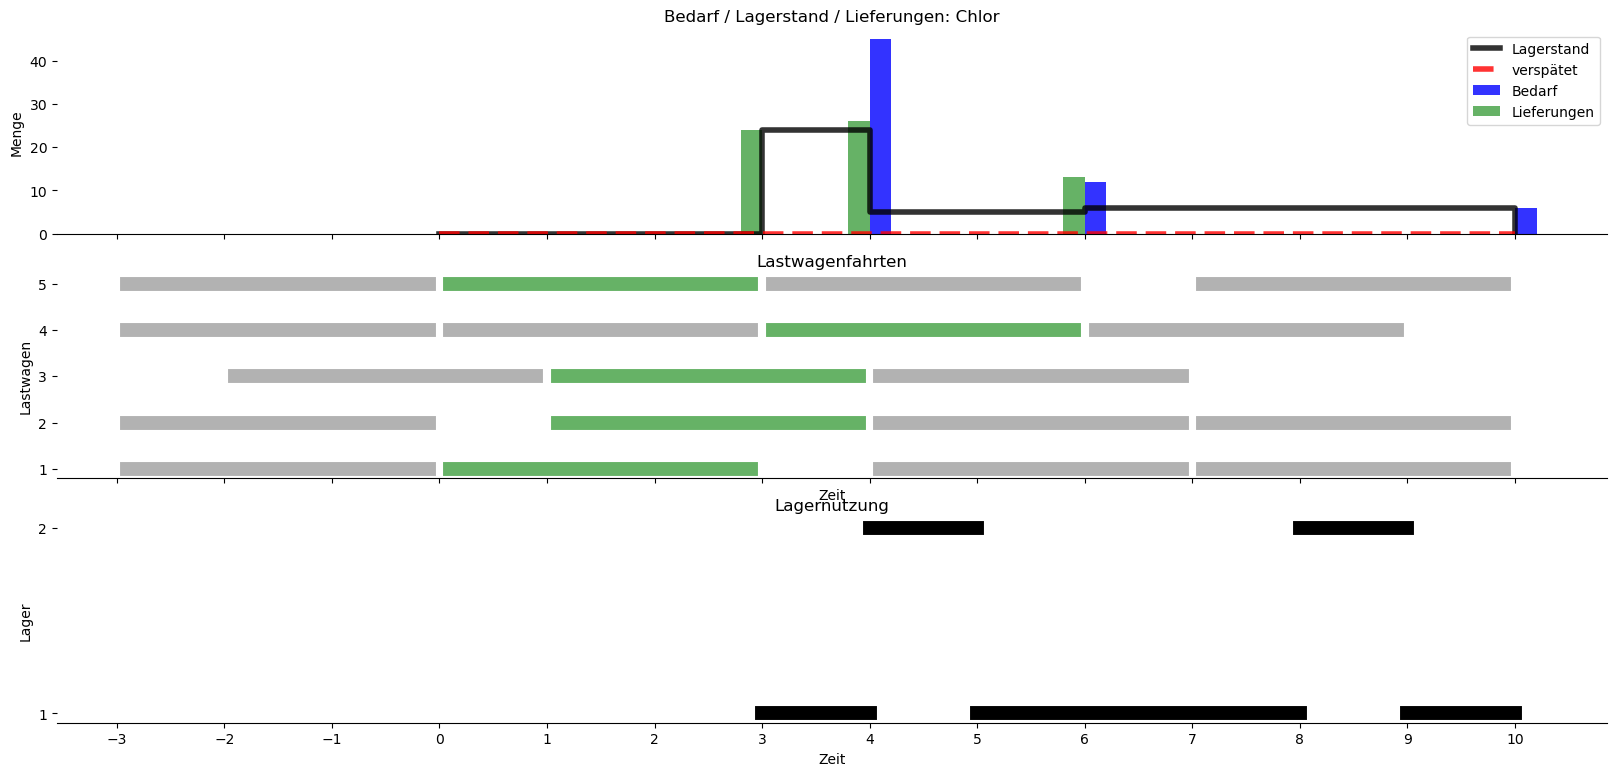

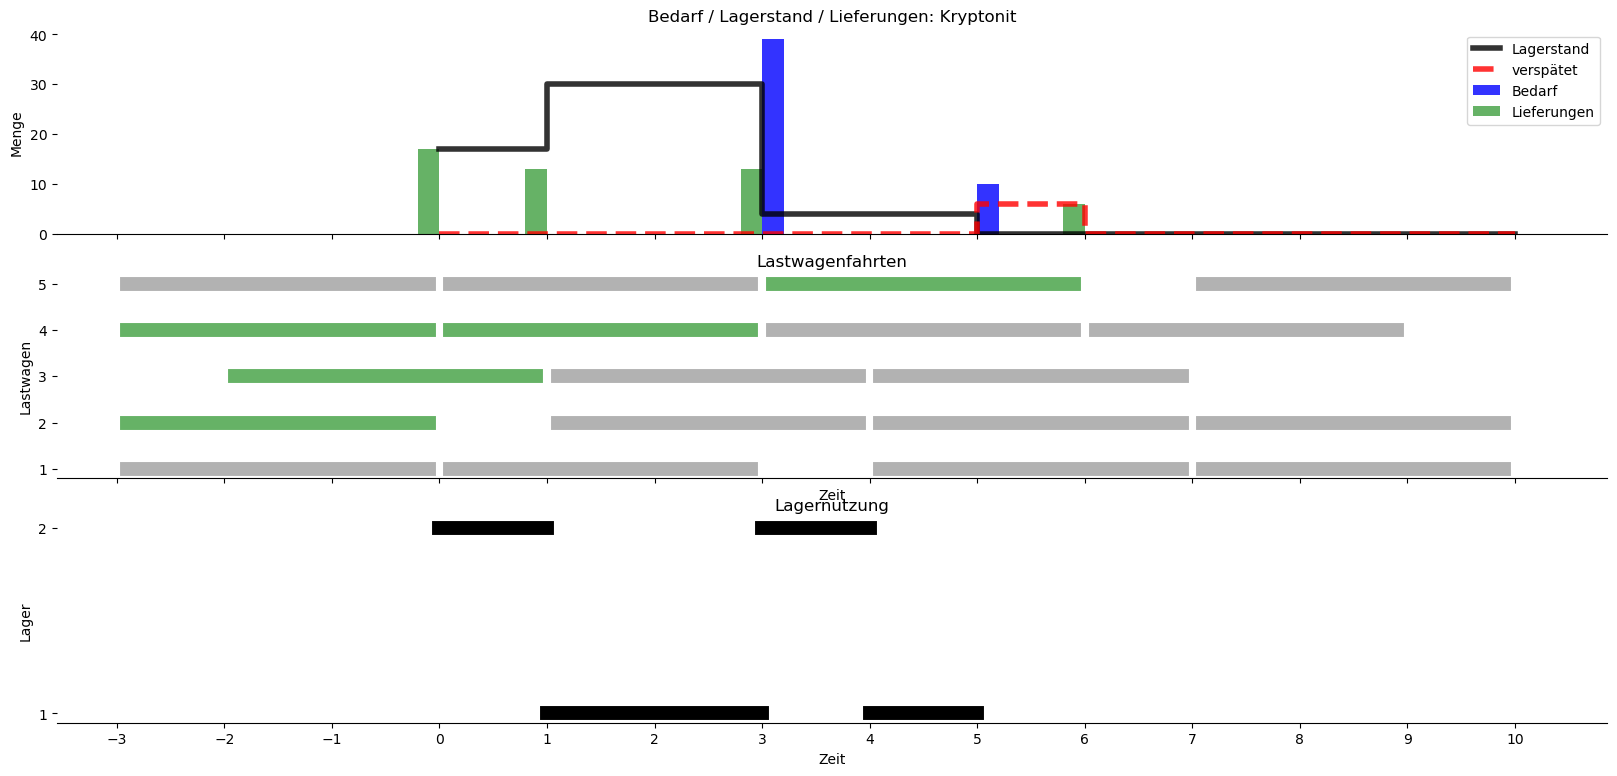

In [17]:
chm.show_solution3(x,z,p,w,inst,chemical=0)
chm.show_solution3(x,z,p,w,inst,chemical=3)
